<a href="https://colab.research.google.com/github/ggoddll99/ds_study/blob/main/mini_project1_dajeong_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YB 미니 프로젝트(1) 조별 과제

- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 10개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

- 조건: 변수 2개 이상 연결한 결과값 포함

- 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다. 데이터 전처리 및 분석 예시는 첨부파일을 참고해주세요.

## **1. 라이브러리 및 데이터**


### Matplotlib 한글 폰트 오류 해결

오류를 해결하려면 Matplotlib을 사용하는 파이썬 프로그램의 앞부분에 한글 폰트를 지정하는 다음의 코드를 추가한다.

참고 자료 : https://www.whatwant.com/entry/matplotlib-hangul-colab-local

1. 폰트 설치
```
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
```
2. 런타임 재시작
3. 폰트 적용

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

# 폰트 적용
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd

# 데이터 불러오기
train=pd.read_csv("./movies_train.csv")
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


## **2. 탐색적 자료분석(EDA)**



+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외) = 감독의 다른 영화에서의 평균 관객 수
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [ ]:
train.shape

(600, 12)

- 600개의 행과 12개의 열이 있다.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


주목할 점 :
* dir_prev_bfnum에서 결측치가 존재하는 것을 알 수 있다.
* bir_prev_bfnum의 Dtype만 float64이다.
* time의 Dtype이 int64이다.
* release_time의 Dtype이 object이다.

### 데이터의 요약통계량 확인

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


+ dir_prev_num의 평균이 0.9이고, min, 25%, 50% 값이 0.0인 것으로 보아, 영화를 처음 만든 감독이 다수 참여했다는 것을 알 수 있다.
+ num_staff의 min 값이 0.0인 것으로 보아, staff 없이 만든 영화가 존재한다는 것을 알 수 있다. 따라서 해당 영화는 다시 조사할 필요가 있다.
+ num_actor의 min 값이 0.0인 것으로 보아, actor 없이 만든 영화가 존재한다는 것을 알 수 있다. 따라서 해당 영화는 다시 조사할 필요가 있다.

### 결측치 확인 및 데이터 전처리


In [ ]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

- 위에서 봤듯이, dir_prev_bfnum 변수에 결측값이 330개 존재한다.

In [ ]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


* 해당 데이터들의 dir_prev_num 값이 0으로 보인다. 좀 더 자세히 알아보기 위해, 위 데이터들의 dir_prev_num 값을 모두 더해본다.

In [ ]:
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

- dir_prev_bfnum이 결측값으로 존재하는 데이터들은 모두 dir_prev_num이 0인 영화이다. 즉, 감독의 이전 작품이 존재 하지 않는다. 따라서 이전 관객수를 의미하는 dir_prev_bfnum의 결측값을 모두 0으로 바꾼다.

In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

- release_time은 시간에 관련된 데이터인데 object로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [ ]:
train['release_time']=pd.to_datetime(train['release_time'])

## **데이터 시각화 및 분석**

#### 1) 영화 배급사에 따른 평균 관객 수 TOP10

In [ ]:
# 영화 배급사를 기준으로 평균 관객 수를 정렬한 후 상위 10개 추출
dist1=train.groupby('distributor').mean()[['box_off_num']].sort_values(by='box_off_num', ascending=False).head(10)
dist1

<ipython-input-15-8513ad0f9fe0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dist1=train.groupby('distributor').mean()[['box_off_num']].sort_values(by='box_off_num', ascending=False).head(10)


,box_off_num
distributor,
CJ E&M Pictures,4.122337e+06
(주)쇼박스,3.386656e+06
(주)아이필름코퍼레이션,3.117859e+06
쇼박스(주)미디어플렉스,2.634823e+06
영구아트무비,2.541603e+06
CJ E&M 영화부문,2.505309e+06
(주)NEW,2.184405e+06
CJ 엔터테인먼트,2.162742e+06
이십세기폭스코리아(주),1.637046e+06


* CJ가 여러 개로 나누어져 있는 것이 관찰된다. 따라서 배급사 이름 전처리가 필요하다.

In [ ]:
# 배급사 이름 전처리 함수
def dist_clean(x):
    if 'CGV' in x:     # 'CGV'가 들어있는 이름은 모두 'CGV'로 바꿈
        return 'CGV'
    elif 'CJ' in x:    # 'CJ'가 들어있는 이름은 모두 'CJ E&M'으로 바꿈
        return 'CJ E&M'
    elif '쇼박스' in x: # '쇼박스'가 들어있는 이름은 모두 '쇼박스'로 바꿈
        return '쇼박스'
    else:
        return x

In [ ]:
# 'distributor' 열에 위 함수 적용
train['distributor'] = train['distributor'].apply(dist_clean)
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ E&M,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [ ]:
# 전처리된 train 데이터로 다시 영화 배급사별 평균 관객 수 상위 10개 추출
dist1=train.groupby('distributor').mean()[['box_off_num']].sort_values(by='box_off_num', ascending=False).head(10)
dist1

<ipython-input-18-14e1c8e86090>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dist1=train.groupby('distributor').mean()[['box_off_num']].sort_values(by='box_off_num', ascending=False).head(10)


,box_off_num
distributor,
쇼박스,3.332954e+06
(주)아이필름코퍼레이션,3.117859e+06
영구아트무비,2.541603e+06
CJ E&M,2.246588e+06
(주)NEW,2.184405e+06
이십세기폭스코리아(주),1.637046e+06
SK텔레콤(주),1.383867e+06
롯데엔터테인먼트,1.238149e+06
전망좋은영화사,1.214237e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  f

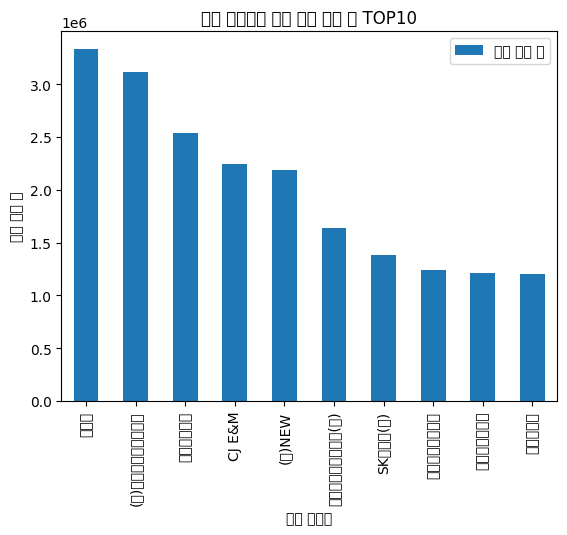

In [ ]:
dist1.plot(kind='bar')

plt.title('영화 배급사에 따른 평균 관객 수 TOP10') # 차트 제목
plt.xlabel('영화 배급사')                          # x축 이름
plt.ylabel('평균 관객 수')                         # y축 이름
plt.legend(labels=['평균 관객 수'], loc='best')    # 범례 표시

#### 2) 감독의 지난 영화 평균 관객 수와 이번 영화 관객 수의 관계

In [ ]:
# 감독의 지난 영화 평균 관객 수 정렬
train.dir_prev_bfnum.sort_values()

0             0.0
350           0.0
349           0.0
348           0.0
347           0.0
          ...    
409     7838528.5
118     7855474.0
16      8223342.0
214     8801639.0
338    17615314.0
Name: dir_prev_bfnum, Length: 600, dtype: float64

* 마지막 행에서 이상치가 관찰된다. 그래프를 그려보고 추후 이상치를 처리한 그래프와 차이가 있는지 살펴본다.

In [ ]:
# 감독의 이번 영화 관객 수 정렬
train.box_off_num.sort_values()

432           1
324           2
338           8
410          10
481          36
         ...   
460    12323595
498    12706663
530    12811435
362    12983841
372    14262766
Name: box_off_num, Length: 600, dtype: int64

In [ ]:
# 감독의 지난 영화 평균 관객 수 이상치 제거
train_new=train[train.dir_prev_bfnum!=train.dir_prev_bfnum.max()]
train_new.dir_prev_bfnum.sort_values()

0            0.0
350          0.0
349          0.0
348          0.0
347          0.0
         ...    
326    6720926.5
409    7838528.5
118    7855474.0
16     8223342.0
214    8801639.0
Name: dir_prev_bfnum, Length: 599, dtype: float64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

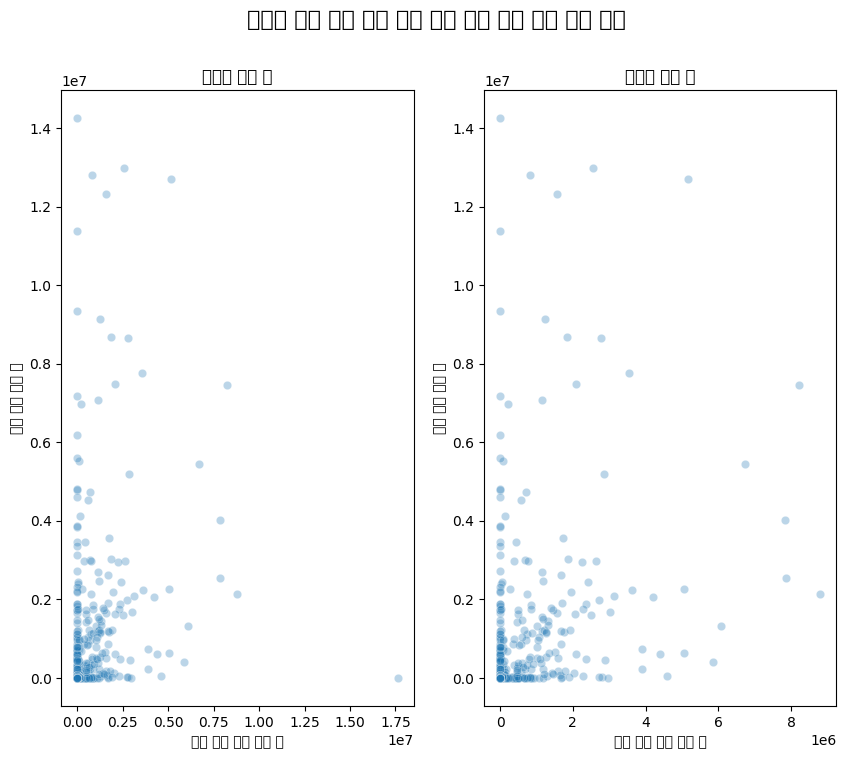

In [ ]:
# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig=plt.figure(figsize=(10, 8))
ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)

# axe 객체에 scatterplot 메소드로 그래프 출력
sns.scatterplot(x='dir_prev_bfnum', # x축 변수
            y='box_off_num',        # y축 변수
            data=train,             # 데이터
            ax=ax1, alpha=0.3)      # axe 객체 - 1번째 그래프

sns.scatterplot(x='dir_prev_bfnum', # x축 변수
            y='box_off_num',        # y축 변수
            data=train_new,         # 데이터
            ax=ax2, alpha=0.3)      # axe 객체 - 2번째 그래프

fig.suptitle('감독의 지난 영화 평균 관객 수와 이번 영화 관객 수의 관계', fontsize=16) # figure 제목

ax1.set_title('이상치 제거 전')
ax2.set_title('이상치 제거 후')

ax1.set_xlabel('지난 영화 평균 관객 수')
ax1.set_ylabel('이번 영화 관객 수')

ax2.set_xlabel('지난 영화 평균 관객 수')
ax2.set_ylabel('이번 영화 관객 수')

plt.show()